In [4]:
DATA_ROOT = "../../data/Traffic_flow-HCM"

# Thư viện

In [122]:
import numpy as np
import pandas as pd

import squarify
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# streets.csv

In [6]:
streets_df = pd.read_csv(f"{DATA_ROOT}/streets.csv")
streets_df.head()

,_id,level,max_velocity,name,type
0,31096786,1,80.0,Quốc Lộ 1,trunk
1,32575737,4,NaN,NaN,unclassified
2,32575794,4,NaN,Chu Văn An,unclassified
3,32575820,4,NaN,Nguyễn Văn Bá,tertiary
4,32575823,4,NaN,Nguyễn Thị Nhỏ,tertiary


In [7]:
streets_df.shape

(5553, 5)

In [8]:
streets_df.isnull().sum()

_id                0
level              0
max_velocity    4566
name            1605
type               0
dtype: int64

In [35]:
streets_df.isnull().sum()*100/len(streets_df)

_id              0.000000
level            0.000000
max_velocity    82.225824
name            28.903296
type             0.000000
dtype: float64

In [9]:
streets_df.duplicated().sum()

np.int64(0)

### Cấp công trình giao thông

In [28]:
level_arr = streets_df["level"]
level_counts = level_arr.value_counts()

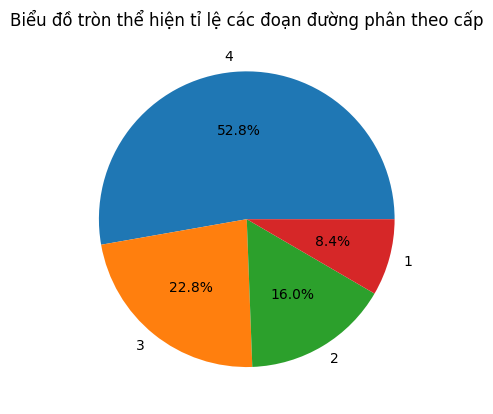

In [43]:
plt.pie(level_counts, labels=level_counts.index, 
        autopct='%1.1f%%')
plt.title("Biểu đồ tròn thể hiện tỉ lệ các đoạn đường phân theo cấp")
plt.show()

### Tốc độ tối đa cho phép

In [51]:
velocity_arr = streets_df[streets_df["max_velocity"].notnull()]["max_velocity"]

In [53]:
velocity_arr.min(), \
velocity_arr.max()

(np.float64(10.0), np.float64(120.0))

<Axes: xlabel='max_velocity', ylabel='Density'>

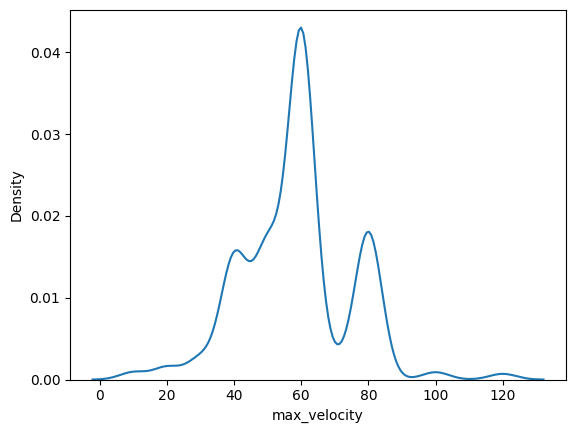

In [58]:
sns.kdeplot(data=velocity_arr)

### Tên đường

In [60]:
name_arr = streets_df[streets_df["name"].notnull()]["name"]
print(len(name_arr))
name_arr.unique()

3948


array(['Quốc Lộ 1', 'Chu Văn An', 'Nguyễn Văn Bá', ..., 'X2', 'X1',
       'Đình Nghi Xuân'], shape=(1048,), dtype=object)

In [72]:
name_counts = name_arr.value_counts()
name_counts.min(), \
name_counts.max()

(np.int64(1), np.int64(169))

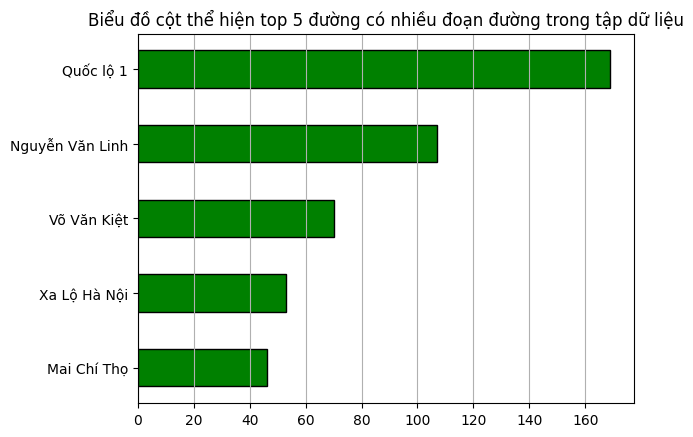

In [91]:
name_counts_head = name_counts.head(5)
plt.barh(y=name_counts_head.index, width=name_counts_head, color="green", edgecolor="black", height=0.5)
plt.title("Biểu đồ cột thể hiện top 5 đường có nhiều đoạn đường trong tập dữ liệu")
plt.gca().invert_yaxis()
plt.grid(axis="x")
plt.show()

In [96]:
# Xem mẫu "Quốc lộ 1"
streets_df[streets_df["name"] == "Quốc lộ 1"].head()

,_id,level,max_velocity,name,type
256,32583460,3,NaN,Quốc lộ 1,trunk_link
458,32928899,1,60.0,Quốc lộ 1,trunk
463,32928907,1,60.0,Quốc lộ 1,trunk
527,33285459,1,80.0,Quốc lộ 1,trunk
528,33285465,1,80.0,Quốc lộ 1,trunk


### Loại đường

In [100]:
type_arr = streets_df[streets_df["name"].notnull()]["type"]
print(len(type_arr))
type_arr.unique()

3948


array(['trunk', 'unclassified', 'tertiary', 'secondary', 'primary_link',
       'primary', 'trunk_link', 'tertiary_link', 'secondary_link',
       'motorway', 'motorway_link'], dtype=object)

In [108]:
type_counts = type_arr.value_counts()
type_counts

type
tertiary          1465
primary            800
secondary          525
unclassified       417
trunk              410
trunk_link         110
primary_link        97
motorway            40
secondary_link      31
motorway_link       27
tertiary_link       26
Name: count, dtype: int64

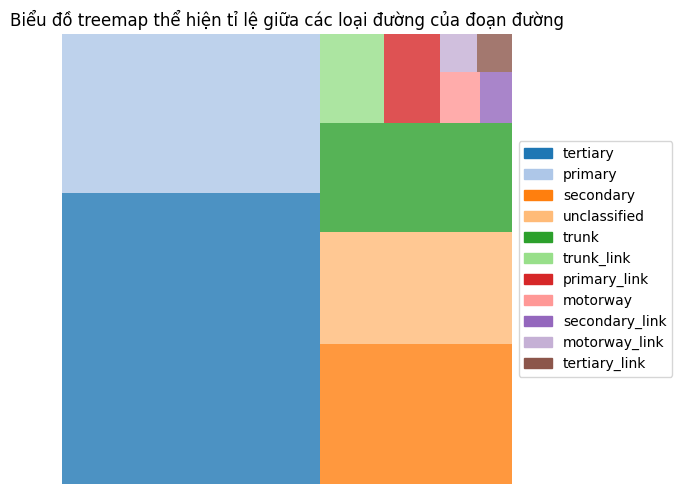

In [120]:
cmap = mpl.colormaps["tab20"]
colors = [cmap(i) for i in range(len(type_counts))]

squarify.plot(
    sizes = type_counts.values,
    alpha = 0.8,
    color = colors
)

legend_patches = [
    mpatches.Patch(color=colors[i], label=type_counts.index[i])
    for i in range(len(type_counts))
]

plt.legend(
    handles=legend_patches,
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.axis('off')
plt.tight_layout()
plt.title("Biểu đồ treemap thể hiện tỉ lệ giữa các loại đường của đoạn đường")
plt.show()
